In [1]:
%load_ext autoreload
%autoreload 1
%aimport gmm_utils

In [2]:
from gmm_utils import generateRandomClusterData, calcResponsibilities, plotDataContours, maximizeLikelihood, gmm_em

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)

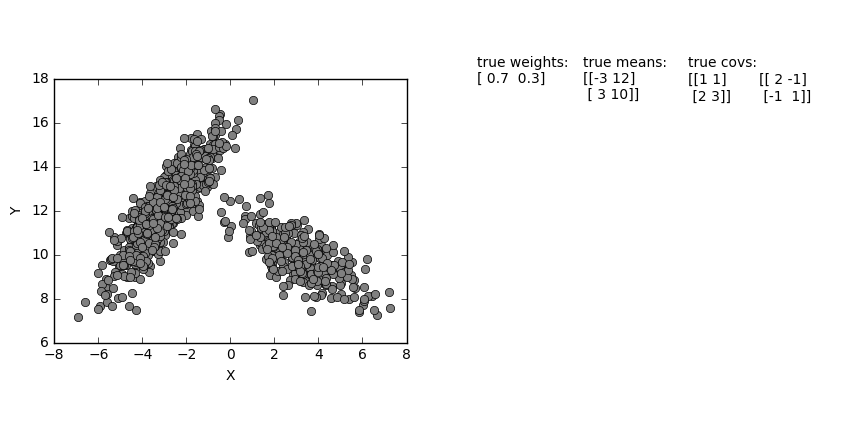

In [4]:
# generate random data points
nPoints = 1000
trueWeights = np.array([0.7, 0.3])
trueMeans = np.array([[-3, 12],[3, 10]])
trueCovs = np.array([[[1,1],[2,3]], [[2,-1],[-1,1]]])
data = generateRandomClusterData(nPoints, trueWeights, trueMeans, trueCovs)
trueParams = {'weights':trueWeights, 'means':trueMeans, 'covs':trueCovs}

fig = plt.figure(1, figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(data[:,0], data[:,1], color='0.5', marker='o', mec='k', ls='None')
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('scaled')
plt.tight_layout

ax2 = plt.subplot(1,2,2)
plt.axis('off')
plt.text(0.0, 0.9, "true weights:\n"+np.array_str(trueWeights), transform=ax2.transAxes, va='top')
plt.text(0.3, 0.9, "true means:\n"+np.array_str(trueMeans), transform=ax2.transAxes, va='top')
plt.text(0.6, 0.9, "true covs:\n", transform=ax2.transAxes, va='top')
plt.text(0.6, 0.855, np.array_str(trueCovs[0]), transform=ax2.transAxes, va='top')
plt.text(0.8, 0.855, np.array_str(trueCovs[1]), transform=ax2.transAxes, va='top')

plt.show()


In [5]:
from scipy.spatial import distance

# initial estimates of means and covariances
nClusters = 2  # choose number of clusters
initWeights = [0.5, 0.5]
centroid1 = np.array(data[np.random.choice(len(data), size=1),:][0])
distances = np.array([distance.euclidean(centroid1, point) for point in data])
distancesP = distances/distances.sum()
centroid2 = np.array(data[np.random.choice(len(data), size=1, p=distancesP)][0])
initMeans = [centroid1, centroid2]
npCovs = [[np.cov(data.T)][0] for i in np.arange(len(initWeights))]

initialParams = {'weights':np.array(initWeights), 'means':np.array(initMeans), 'covs':np.array(npCovs)}

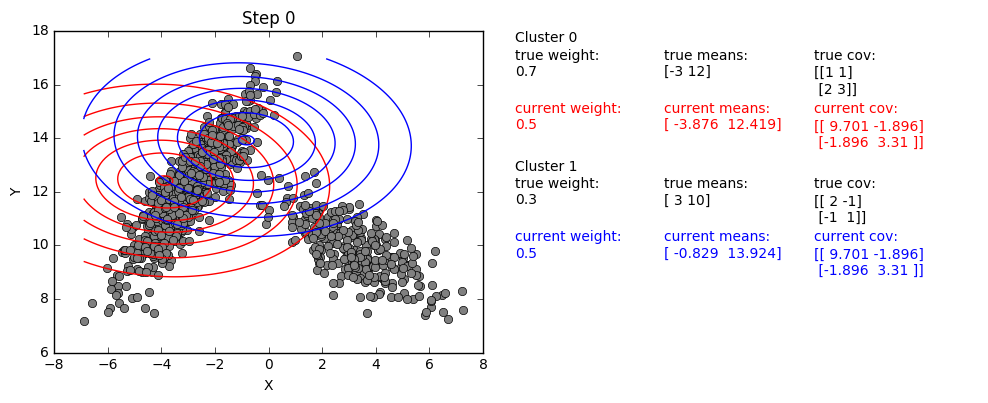

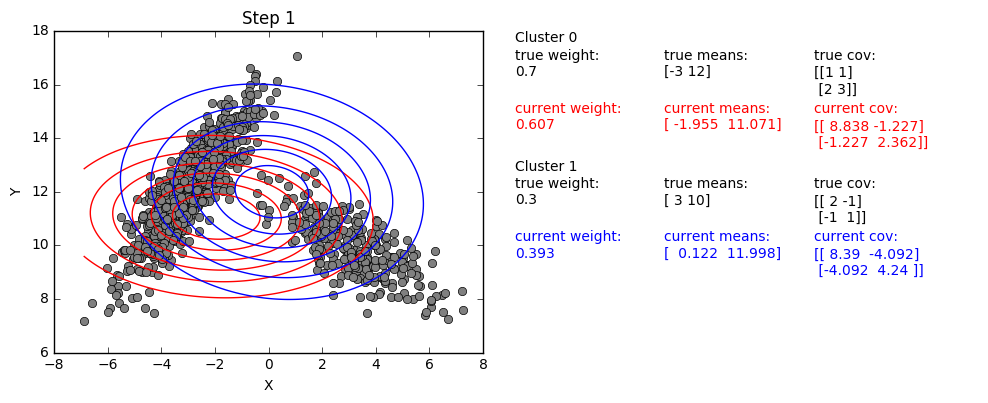

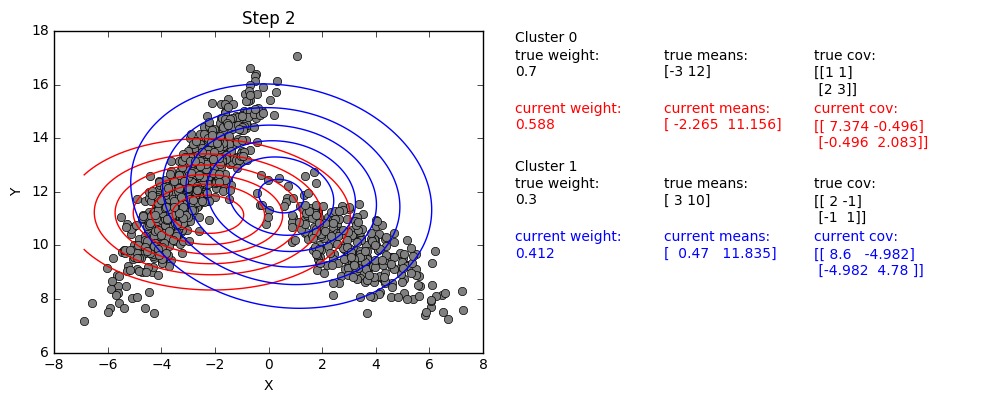

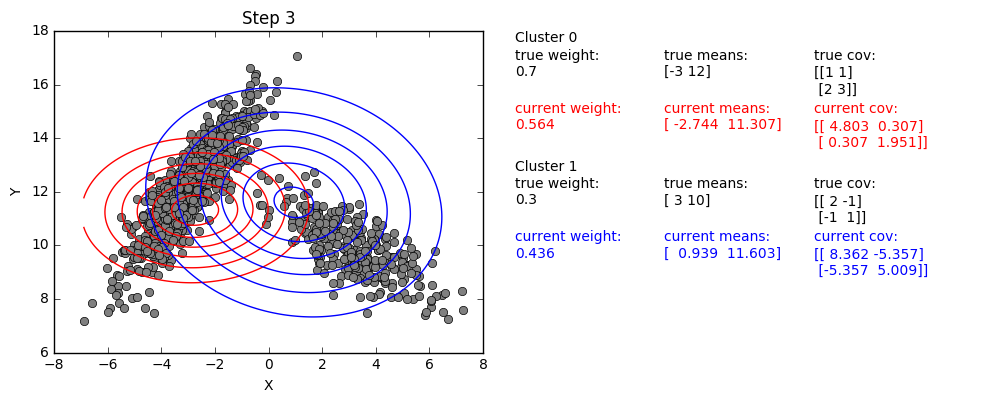

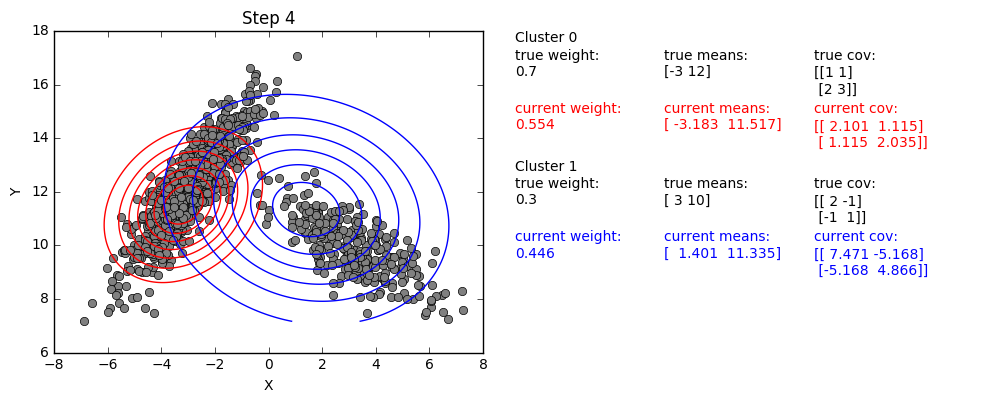

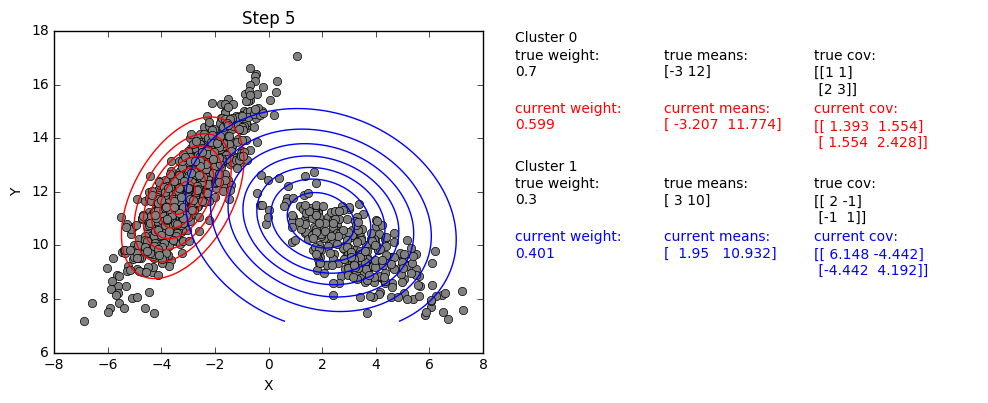

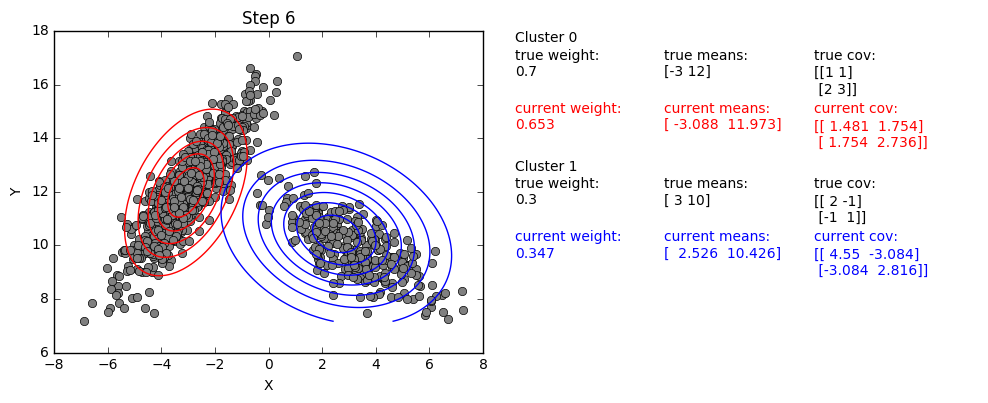

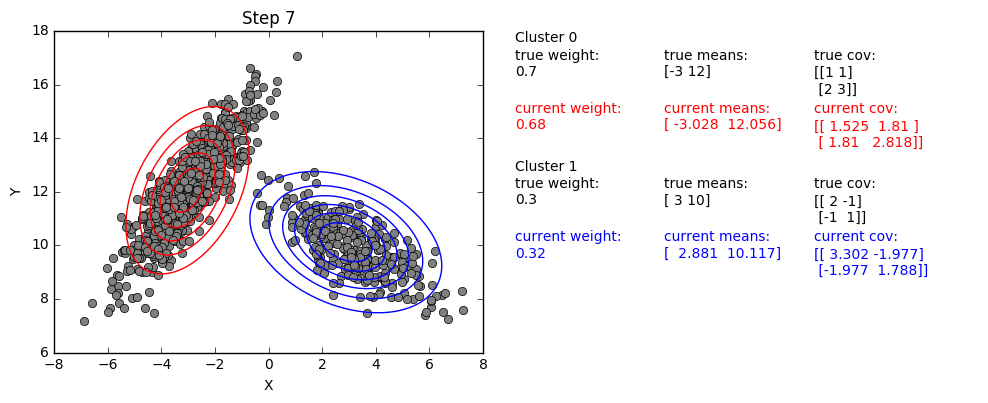

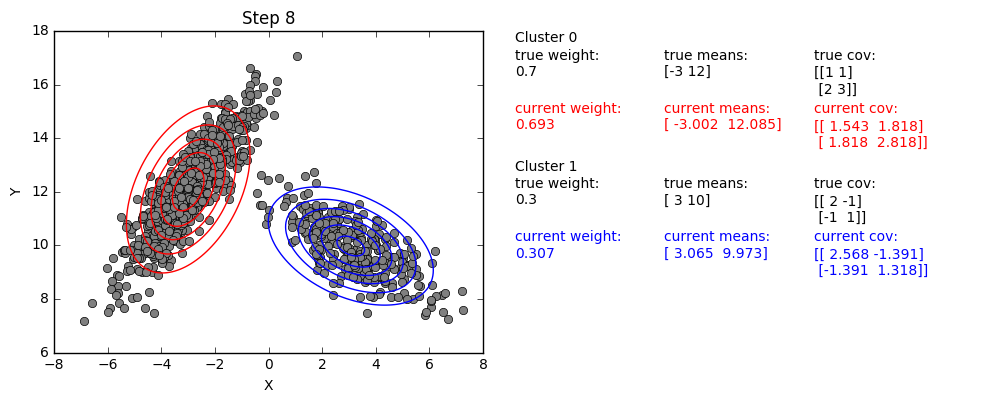

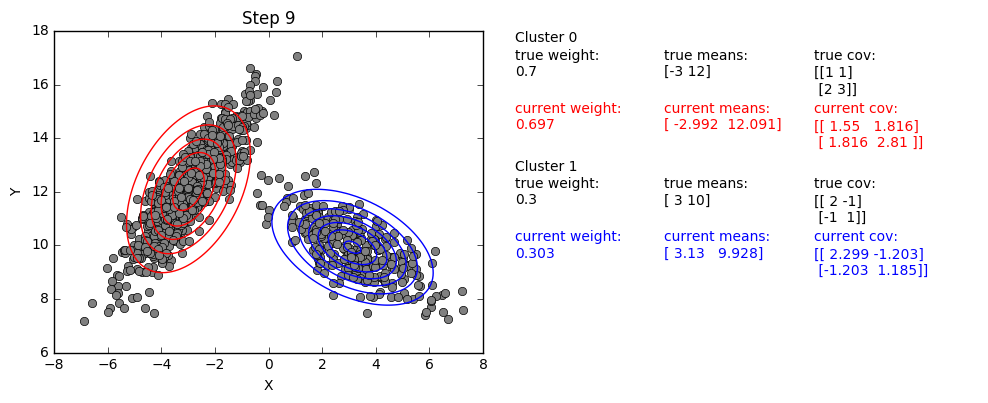

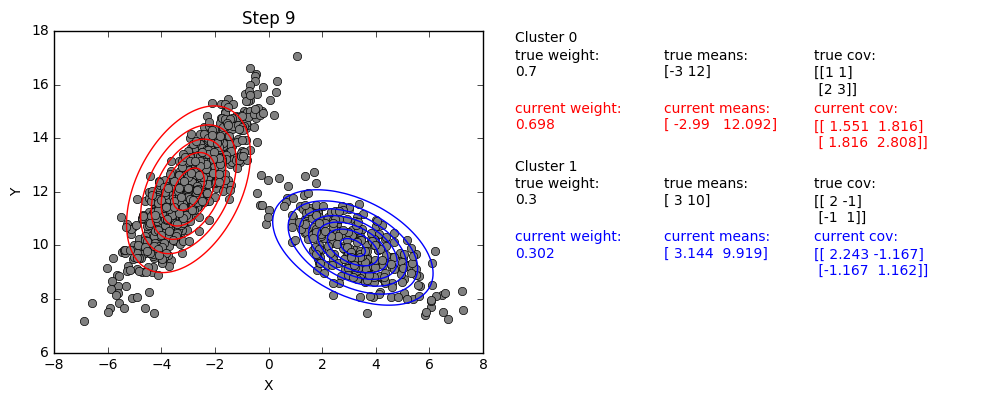

In [17]:
# run EM algorithm
results = gmm_em(data, initialParams, trueParams, maxSteps=10)